<a href="https://colab.research.google.com/github/Elish-Ab/AI-Mastery-10x-Week1/blob/task-3/Task3_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
news_df = pd.read_csv('raw_analyst_ratings.csv')
stock_df = pd.read_csv('GOOG_historical_data.csv')

In [2]:
# Example: Strip out any extraneous text before converting to datetime
news_df['date'] = news_df['date'].astype(str)  # Convert the 'date' column to string type
news_df['date'] = news_df['date'].str.extract(r'(\d{4}-\d{2}-\d{2})')[0]
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Check how many are still missing
missing_dates = news_df['date'].isnull().sum()
print(f"Number of missing dates after extraction: {missing_dates}")
stock_df['date'] = pd.to_datetime(stock_df['Date'], errors='coerce')

Number of missing dates after extraction: 1


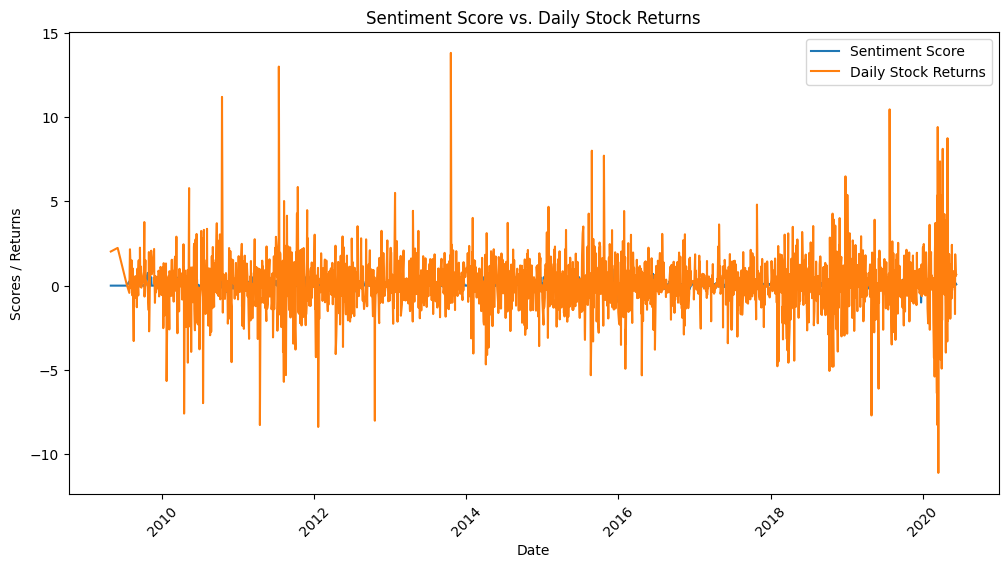

Monthly Correlation between daily news sentiment scores and stock returns:
Monthly Correlation Coefficient: -0.04092714922435001

Yearly Correlation between daily news sentiment scores and stock returns:
Yearly Correlation Coefficient: 0.6532306784618973


In [3]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment_score'] = news_df['headline'].apply(get_sentiment)

# Calculate Stock Movements
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100

# Merge Data
merged_data = pd.merge(stock_df, news_df, on='date', how='inner')

# Aggregate Sentiments
avg_sentiment_scores = merged_data.groupby('date')['sentiment_score'].mean().reset_index()

# Align Data for Correlation Calculation
aligned_data = merged_data.groupby('date').agg({'sentiment_score': 'mean', 'daily_return': 'mean'}).reset_index()

# Set the date column as the index
aligned_data.set_index('date', inplace=True)

# Convert the index to DatetimeIndex
aligned_data.index = pd.to_datetime(aligned_data.index)

# Calculate Monthly and Yearly Correlation
monthly_correlation = aligned_data.resample('M').mean().corr().loc['sentiment_score', 'daily_return']
yearly_correlation = aligned_data.resample('Y').mean().corr().loc['sentiment_score', 'daily_return']

# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(aligned_data.index, aligned_data['sentiment_score'], label='Sentiment Score')
plt.plot(aligned_data.index, aligned_data['daily_return'], label='Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Scores / Returns')
plt.title('Sentiment Score vs. Daily Stock Returns')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Output
print("Monthly Correlation between daily news sentiment scores and stock returns:")
print(f"Monthly Correlation Coefficient: {monthly_correlation}")

print("\nYearly Correlation between daily news sentiment scores and stock returns:")
print(f"Yearly Correlation Coefficient: {yearly_correlation}")